# Scan analysis - shap

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [29]:
import pandas as pd

import itertools

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from xgboost import XGBRegressor
import shap


from plots2.fns import (
    get_corner_annotations
)


from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
)

from poly2.utils import (
    get_dispersal_kernel, trait_vec, beta_dist, gamma_dist,
    get_dist_var, get_dist_mean, edge_values
)
from poly2.shap import get_shap_values
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

In [3]:
df = pd.read_csv('../outputs/combined/scan_all.csv')

In [4]:
df_use = df.loc[lambda x: (x.run<8000)]

X = (
    df_use
    .drop([
        'best_dose',
        'n_pos_diff',
        'run'
    ], axis=1)
    .rename(columns = {
        'dec_rate_multiplier': 'dec_rate',
        'm_prop_multiplier': 'm_prop',
        'm_scale_multiplier': 'm_scale',
        'asymptote': 'asymp',
    })
)

# y = df_use.loc[:, ['run', 'best_dose']]

In [5]:
X.head()

,year,in_0p0_0p1,in_0p1_0p2,in_0p2_0p3,in_0p3_0p4,in_0p4_0p5,in_0p5_0p6,in_0p6_0p7,in_0p7_0p8,in_0p8_0p9,in_0p9_1p0,mu,b,asymp,dec_rate,m_prop,m_scale,ME_var,ME_mean
0,1,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
1,2,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
2,3,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
3,4,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241
4,5,1.0,5.054079e-27,7.584700e-34,1.472094e-39,4.846678e-45,9.976588e-51,5.108758e-57,1.715553e-64,2.492945e-74,3.501367e-90,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,5.044122e-17,0.398241


# Load XGBoost model

In [6]:
%%time

X_use = X

shap_values = get_shap_values(X_use)

________________________________________________________________________________
[Memory] Calling poly2.shap.get_shap_values...
get_shap_values(        year  in_0p0_0p1    in_0p1_0p2    in_0p2_0p3    in_0p3_0p4  \
0          1         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
1          2         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
2          3         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
3          4         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
4          5         1.0  5.054079e-27  7.584700e-34  1.472094e-39   
...      ...         ...           ...           ...           ...   
279995    31         1.0  1.822585e-27  1.185531e-35  1.405050e-42   
279996    32         1.0  1.822585e-27  1.185531e-35  1.405050e-42   
279997    33         1.0  1.822585e-27  1.185531e-35  1.405050e-42   
...)
start


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


done
____________________________________________get_shap_values - 20007.9s, 333.5min
Wall time: 5h 33min 28s


# Fig 4

In [17]:
HEIGHT = 5.8
WIDTH = 5.8

MAX_DISPLAY = 8

In [18]:
plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title

## A

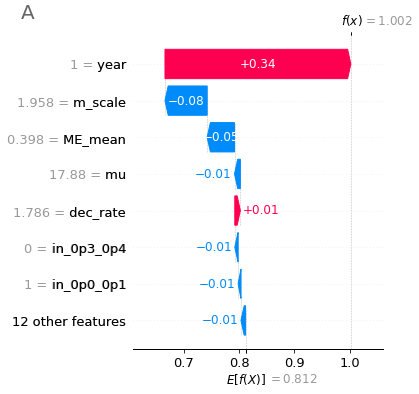

In [19]:
plt.close('all')

shap.plots.waterfall(
    shap_values[0],
    max_display=MAX_DISPLAY,
    show=False,
)

f = plt.gcf()

f.set_figwidth(WIDTH)
f.set_figheight(HEIGHT)

f.patch.set_facecolor('white')

plt.annotate(
    'A',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

f.tight_layout(rect=[0, 0, 1, 0.95])

f

In [20]:
f.savefig('../figures/to_combine/fig4_1.jpg', dpi=300, bbox_inches="tight")

## B

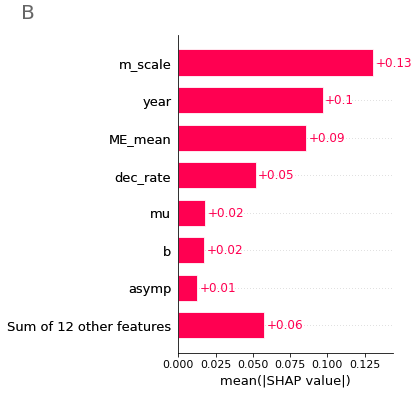

In [21]:
plt.close('all')

shap.plots.bar(shap_values, max_display=MAX_DISPLAY, show=False)

f = plt.gcf()

f.set_figwidth(WIDTH)
f.set_figheight(HEIGHT)

f.patch.set_facecolor('white')

plt.annotate(
    'B',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

f.tight_layout(rect=[0, 0, 1, 0.95])



f

In [22]:
f.savefig('../figures/to_combine/fig4_2.jpg', dpi=300, bbox_inches="tight")

## C

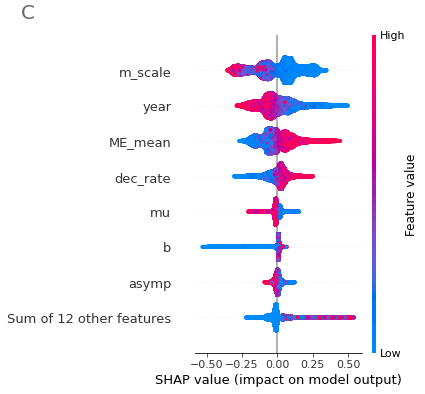

In [23]:
plt.close('all')

shap.plots.beeswarm(shap_values, max_display=MAX_DISPLAY, plot_size=(WIDTH,HEIGHT), show=False)

f = plt.gcf()

f.patch.set_facecolor('white')

plt.annotate(
    'C',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

f.tight_layout(rect=[0, 0, 1, 0.95])

f

In [24]:
f.savefig('../figures/to_combine/fig4_3.jpg', dpi=300, bbox_inches="tight")

## D

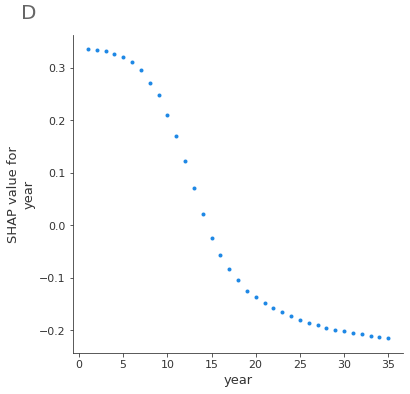

In [25]:
plt.close('all')

shap.plots.scatter(
    shap_values[:35, "year"], 
    # color=shap_values,
    hist=False,
    show=False,
)

f = plt.gcf()

f.patch.set_facecolor('white')

f.set_figwidth(WIDTH)
f.set_figheight(HEIGHT)

plt.annotate(
    'D',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

f.tight_layout(rect=[0, 0, 1, 0.95])

f

In [26]:
f.savefig('../figures/to_combine/fig4_4.jpg', dpi=300, bbox_inches="tight")

Use the following command:

```
magick montage fig4_[1-4].jpg -geometry XXxYY+dx+dy output.jpg
```

```
cd Documents\Python\PhD\poly2\polygenic2\figures\to_combine
magick montage fig4_[1-4].jpg -geometry 1000x1000+80+40 fig4.jpg
```

# Fig 5

In [30]:
cf = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
asymptote = None
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None



In [31]:
a = cf.k_mu*cf.k_b
b = cf.k_b

init_dist = gamma_dist(cf.n_k, a, b)


asymptote = 1

#
# * in trait space, get mean and variance

tv = trait_vec(cf.n_k)
# NB get_dist_var/mean needs init_dist to be shape (n_k, n_years)
reshaped = init_dist.reshape((cf.n_k, 1))
tv_var = get_dist_var(reshaped, tv)[0]
tv_mean = get_dist_mean(reshaped, tv)[0]

# NB max_effect = 1 - w + w * exp(-curv)
#               = 1 - w + w * k
max_effect_mean = 1 - asymptote + asymptote * tv_mean
max_effect_var = (asymptote**2) * tv_var

ev = edge_values(10)
dist_summary = gamma_dist(10, a, b)

In [161]:
def get_colors(array, mappable):
    return mappable.to_rgba(array)

In [214]:
cmap1([1,1,1, 8])

array([[1.        , 0.03921569, 0.03921569, 1.        ],
       [1.        , 0.03921569, 0.03921569, 1.        ],
       [1.        , 0.03921569, 0.03921569, 1.        ],
       [1.        , 0.31372549, 0.31372549, 1.        ]])

In [234]:
cvals  = [0, 0.75, 1.25, 10]
# cvals = shap_values[:, 'm_scale'].data
colors = ["red", "white", "white", "blue"]

norm=plt.Normalize(min(cvals), max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cmap1 = LinearSegmentedColormap.from_list("", tuples)

In [235]:
cmap1([0,1,2,10])

array([[1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.05228758, 0.05228758, 1.        ],
       [1.        , 0.10457516, 0.10457516, 1.        ],
       [1.        , 0.52287582, 0.52287582, 1.        ]])

In [240]:
cmappable1 = ScalarMappable(cmap='cool')

In [241]:
cmappable1.to_rgba([0,1,10])

array([[0.        , 1.        , 1.        , 1.        ],
       [0.09803922, 0.90196078, 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        ]])

In [230]:
cc = sns.diverging_palette(0, 10, as_cmap=True)

In [242]:
cvals  = [0, 0.75, 1.25, 10]
colors = [(1,0,1), "white", "white", (0,1,1)]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cm1 = LinearSegmentedColormap.from_list("", tuples)

Wall time: 13.9 s


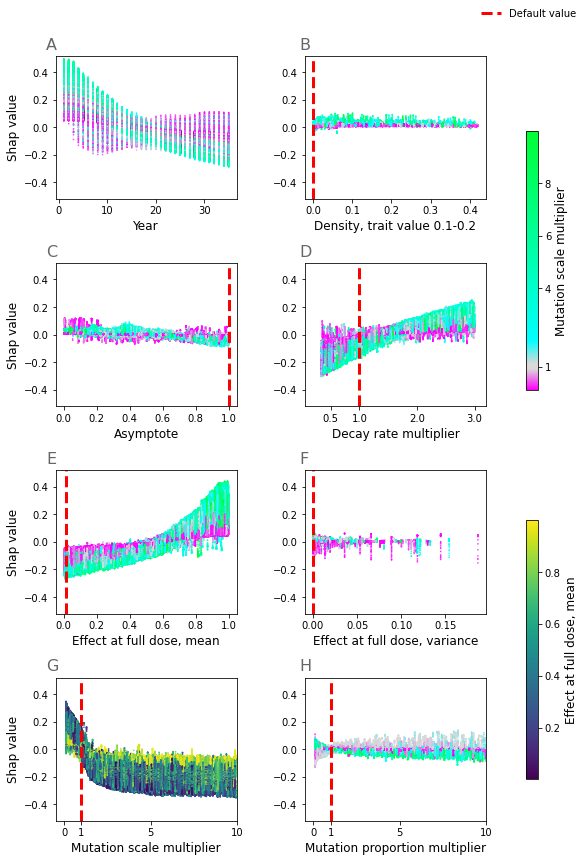

In [253]:
%%time

plt.close('all')

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title


f, ax = plt.subplots(4, 2, figsize=(8, 12))

alpha = 0.8
size = 0.4

# dot = 2
# shap.plots.scatter(shap_values[:, "year"],       hist=False, ax=ax[0][0], show=False, alpha=alpha, dot_size=dot, color=shap_values)
# shap.plots.scatter(shap_values[:, "in_0p1_0p2"], hist=False, ax=ax[0][1], show=False, alpha=alpha, dot_size=dot, color=shap_values)

# shap.plots.scatter(shap_values[:, "asymp"],    hist=False, ax=ax[1][0], show=False, alpha=alpha, dot_size=dot, color=shap_values)
# shap.plots.scatter(shap_values[:, "dec_rate"], hist=False, ax=ax[1][1], show=False, alpha=alpha, dot_size=dot, color=shap_values)

# shap.plots.scatter(shap_values[:, "ME_mean"], hist=False, ax=ax[2][0], show=False, alpha=alpha, dot_size=dot, color=shap_values)
# shap.plots.scatter(shap_values[:, "ME_var"],  hist=False, ax=ax[2][1], show=False, alpha=alpha, dot_size=dot, color=shap_values)

# shap.plots.scatter(shap_values[:, "m_scale"], hist=False, ax=ax[3][0], show=False, alpha=alpha, dot_size=dot, color=shap_values)
# shap.plots.scatter(shap_values[:, "m_prop"],  hist=False, ax=ax[3][1], show=False, alpha=alpha, dot_size=dot, color=shap_values)

# DATA

# cmap1 = cm.ScalarMappable(cmap='cool')
# cvals  = [0, 1, 10]
# colors = ["red", "white", "blue"]
grey = (0.85, 0.85, 0.85)
blue1 = (0,1,1)
blue2 = (0,1,0.2)
cvals  = [0.1, 0.9, 1.1, 2, 10]
colors = [(1,0,1), grey, grey, blue1, blue2]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cm1 = LinearSegmentedColormap.from_list("", tuples)
cmap1 = cm.ScalarMappable(cmap=cm1)
cmap2 = cm.ScalarMappable(cmap='viridis')



# colors1 = cmap1.to_rgba(shap_values[:, 'm_scale'].data)
colors1 = cmap1.to_rgba(shap_values[:, 'm_scale'].data)
colors2 = cmap2.to_rgba(shap_values[:, 'ME_mean'].data)


ax[0][0].scatter(shap_values[:, "year"].data, shap_values[:, "year"].values,
    alpha=alpha, 
    color=colors1,
    s=size)

ax[0][1].scatter(shap_values[:, "in_0p1_0p2"].data, shap_values[:, "in_0p1_0p2"].values,
    alpha=alpha, 
    color=colors1,
    s=size)

ax[1][0].scatter(shap_values[:, "asymp"].data, shap_values[:, "asymp"].values,
    alpha=alpha, 
    color=colors1,
    s=size)

ax[1][1].scatter(shap_values[:, "dec_rate"].data, shap_values[:, "dec_rate"].values,
    alpha=alpha, 
    color=colors1,
    s=size)

ax[2][0].scatter(shap_values[:, "ME_mean"].data, shap_values[:, "ME_mean"].values,
    alpha=alpha, 
    color=colors1,
    s=size)

ax[2][1].scatter(shap_values[:, "ME_var"].data, shap_values[:, "ME_var"].values,
    alpha=alpha, 
    color=colors1,
    s=size)

ax[3][0].scatter(shap_values[:, "m_scale"].data, shap_values[:, "m_scale"].values,
    alpha=alpha, 
    color=colors2, 
    s=size)

ax[3][1].scatter(shap_values[:, "m_prop"].data, shap_values[:, "m_prop"].values,
    alpha=alpha, 
    color=colors1,
    s=size)

# LAYOUT

ax[0][0].set_xlabel('Year')
ax[0][1].set_xlabel('Density, trait value 0.1-0.2')

ax[1][0].set_xlabel('Asymptote')
ax[1][1].set_xlabel('Decay rate multiplier')

ax[2][0].set_xlabel('Effect at full dose, mean')
ax[2][1].set_xlabel('Effect at full dose, variance')

ax[3][0].set_xlabel('Mutation scale multiplier')
ax[3][1].set_xlabel('Mutation proportion multiplier')



ax[1][0].set_xlim([-0.05,1.05])
ax[1][1].set_xlim([0.05, 3.2])

ax[2][0].set_xlim([-0.05,1.05])

ax[3][0].set_xlim([-0.5,10])
ax[3][1].set_xlim([-0.5,10])



ax[1][1].set_xticks([0.5, 1, 2, 3])

ax[3][0].set_xticks([0, 1, 5, 10])
ax[3][1].set_xticks([0, 1, 5, 10])



for ii, jj in itertools.product(np.arange(4), np.arange(2)):
    ax[ii][jj].spines['top'].set_visible(True)
    ax[ii][jj].spines['right'].set_visible(True)
    

    ax[ii][jj].set_ylim([-0.52, 0.52])
    
    if jj==0:
        ax[ii][jj].set_ylabel('Shap value')
    else:
        ax[ii][jj].set_ylabel('')

    
    
ax[0][1].axvline(dist_summary[1], color='r', label='Default value', ls='--', lw=3)

ax[1][0].axvline(1, color='r', ls='--', lw=3)
ax[1][1].axvline(1, color='r', ls='--', lw=3)

ax[2][0].axvline(max_effect_mean, color='r', ls='--', lw=3)
ax[2][1].axvline(max_effect_var, color='r', ls='--', lw=3)

ax[3][0].axvline(1, color='r', ls='--', lw=3)
ax[3][1].axvline(1, color='r', ls='--', lw=3)


f.patch.set_facecolor('white')

f.align_ylabels()

plt.tight_layout(rect=[0, 0, 0.88, 0.95], h_pad=3, w_pad=3)
# plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=2, w_pad=4)

xx = 0.92
dx = 0.02
dy = 0.3

cax1 = plt.axes([xx, 0.55, dx, dy])
plt.colorbar(cmap1, cax=cax1, label='Mutation scale multiplier', ticks=[1, 4, 6, 8])

cax2 = plt.axes([xx, 0.1, dx, dy])
plt.colorbar(cmap2, cax=cax2, label='Effect at full dose, mean')

get_corner_annotations(2, 4, 0.08, 0.94, 0.44, 0.2395, plt)

f.legend(
    loc=1,
    framealpha=0,
)

f

In [254]:
f.savefig('../figures/paper/fig5.jpg', dpi=300, bbox_inches="tight")

In [63]:
variable = 'in_0p1_0p2'
np.min(shap_values[:, variable].values), np.max(shap_values[:, variable].values)

(-0.043463577, 0.10160281)

In [75]:
X.columns

Index(['year', 'in_0p0_0p1', 'in_0p1_0p2', 'in_0p2_0p3', 'in_0p3_0p4',
       'in_0p4_0p5', 'in_0p5_0p6', 'in_0p6_0p7', 'in_0p7_0p8', 'in_0p8_0p9',
       'in_0p9_1p0', 'mu', 'b', 'asymp', 'dec_rate', 'm_prop', 'm_scale',
       'ME_var', 'ME_mean'],
      dtype='object')

## Tester

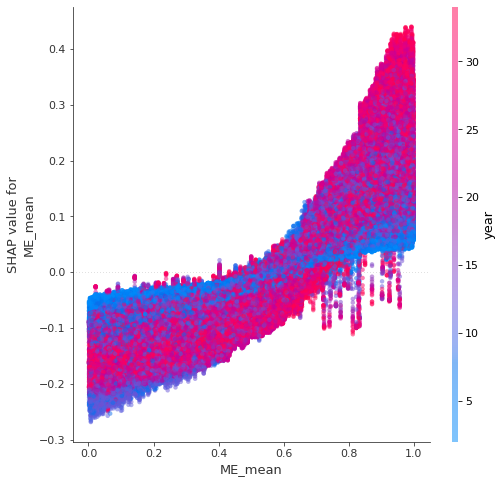

In [176]:
plt.close('all')

f, ax = plt.subplots(figsize=(8,8))

# N = -1

variable = 'ME_mean'
interaction = 'year'

shap.plots.scatter(
    shap_values[:, variable],
    hist=False,
    ax=ax,
    show=False,
    alpha=0.5,
    dot_size=20,
    color=shap_values[:, interaction]
)

# ax[1].scatter(shap_values[:, variable].data, shap_values[:, "m_scale"].values,
#     alpha=alpha, color=get_colors(shap_values[:, 'year'].data), s=0.2)

f.patch.set_facecolor('white')

# ax[1].set_xlim([-0.8, 13])

f